# Task 1: Student Score Prediction

**Description**:
- Dataset (Recommended): Student Performance Factors (Kaggle)
- Build a model to predict students' exam scores based on their study hour
- Perform data cleaning and basic visualization to understand the datase
- Split the dataset into training and testing set
- Train a linear regression model to estimate final score
- Visualize predictions and evaluate model performance
  

# 1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score


# 2.Load the Data

In [7]:
df = pd.read_csv("data/students_data.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [9]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [12]:
sum(df.duplicated())

0

In [13]:
df.drop(['StudentID','GPA'],axis=1,inplace=True)
df.shape

(2392, 13)

- The dataset contains a total of 2,392 observations.
- All values in the dataset are non-null and numerical.
- There are no duplicate records.
- Our target variable is `GradeClass`, that is why `GPA` column should be dropped, as these columns give similar information.
- After removing the `StudentID` and `GPA` columns, the dataset consists of 13 columns.

# 3.Data Visualization

## 3.1 Distribution of Categorical Columns

In [16]:
# Identify numerical columns: columns with more than 5 unique values are considered numerical
numerical_columns = [col for col in df.columns if df[col].nunique() > 5]

# Identify categorical columns: columns that are not numerical and not 'GradeClass'
categorical_columns = df.columns.difference(numerical_columns).difference(['GradeClass']).to_list()

In [17]:
# Custom labels for the categorical columns
custom_labels = {
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'Age': [15, 16, 17, 18],
    'ParentalEducation': ['None', 'High School', 'Some College', 'Bachelor\'s', 'Higher'],
    'Tutoring': ['No', 'Yes'],
    'ParentalSupport': ['No', 'Low', 'Moderate', 'High', 'Very High'],
    'Extracurricular': ['No', 'Yes'],
    'Sports': ['No', 'Yes'],
    'Music': ['No', 'Yes'],
    'Volunteering': ['No', 'Yes'],
    'Gender': ['Male', 'Female']
}

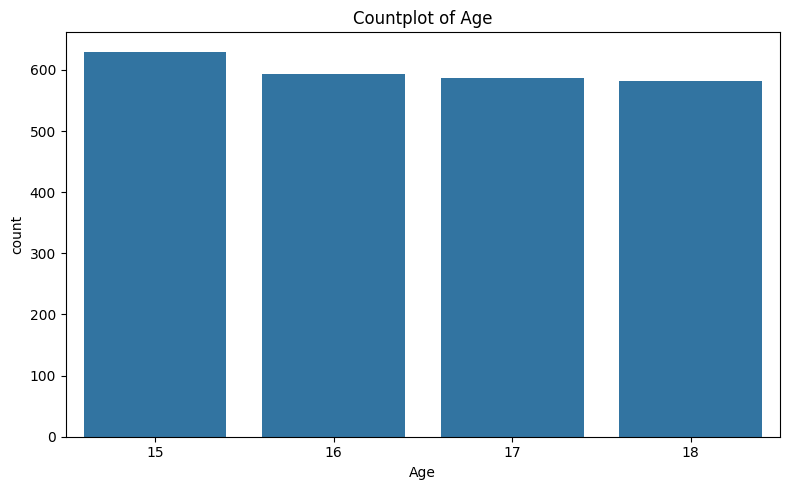

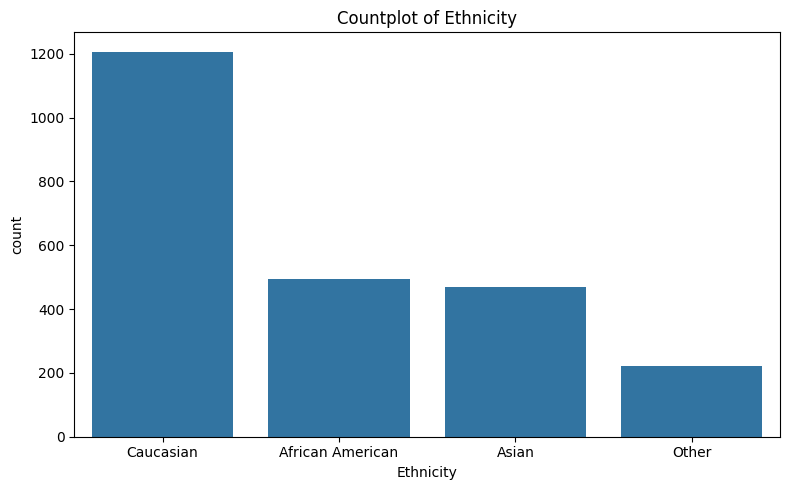

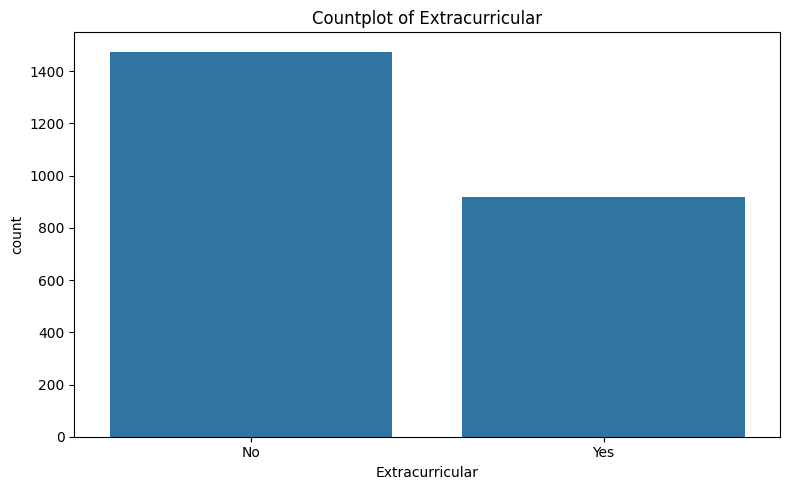

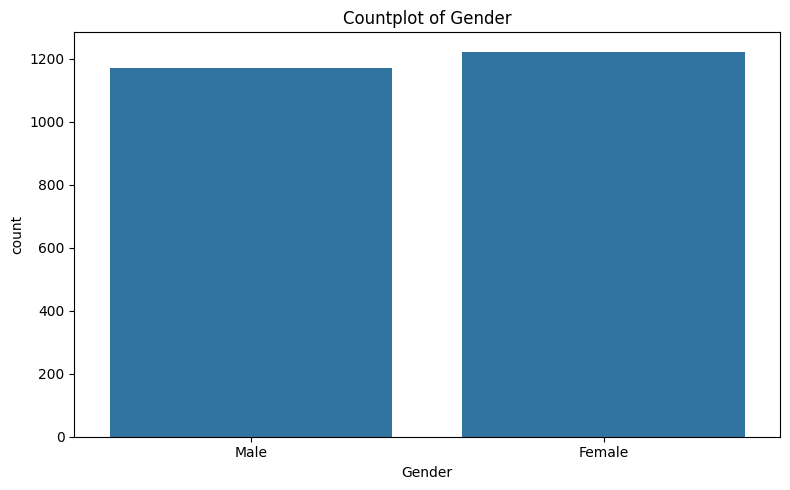

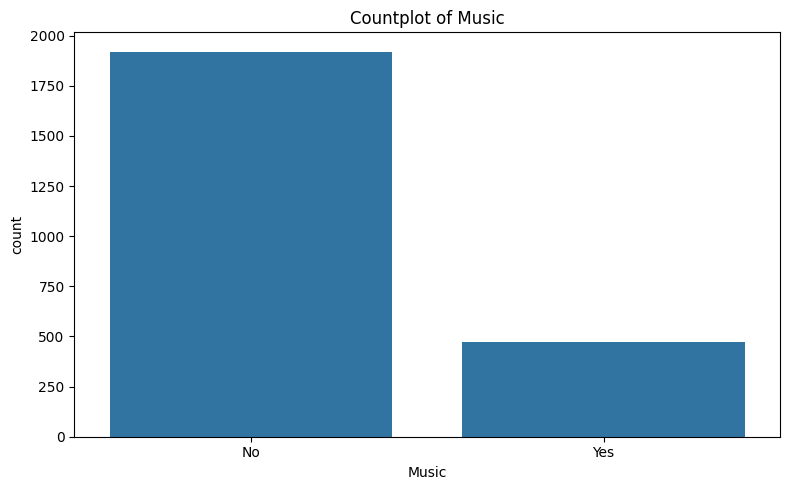

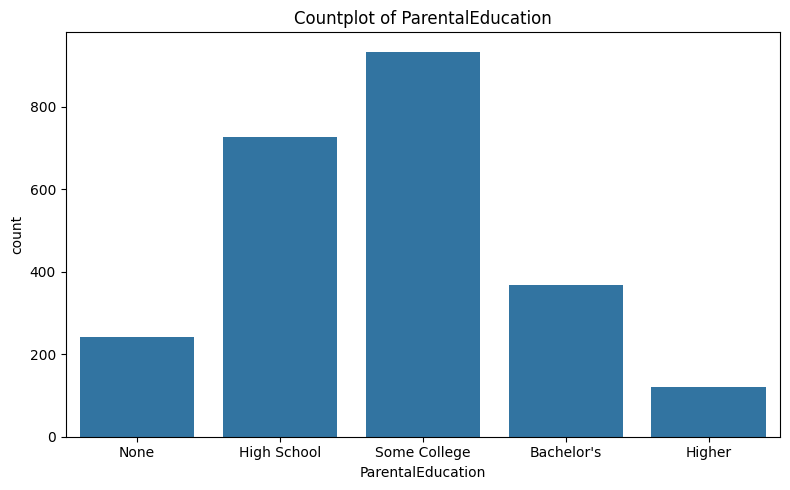

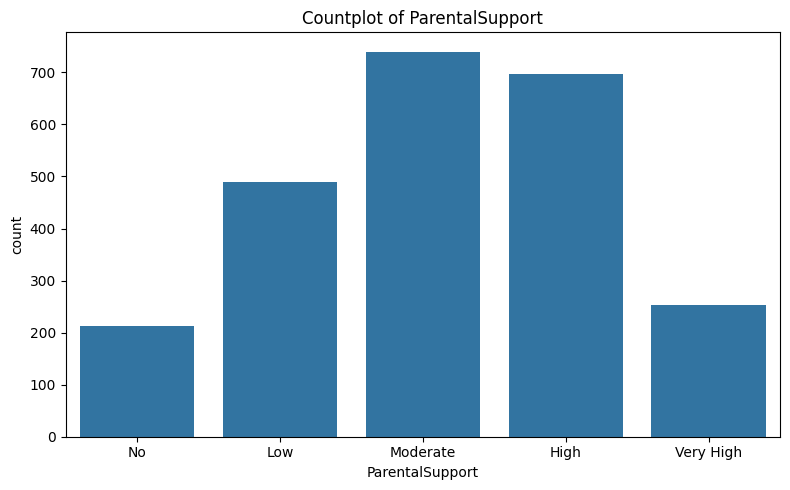

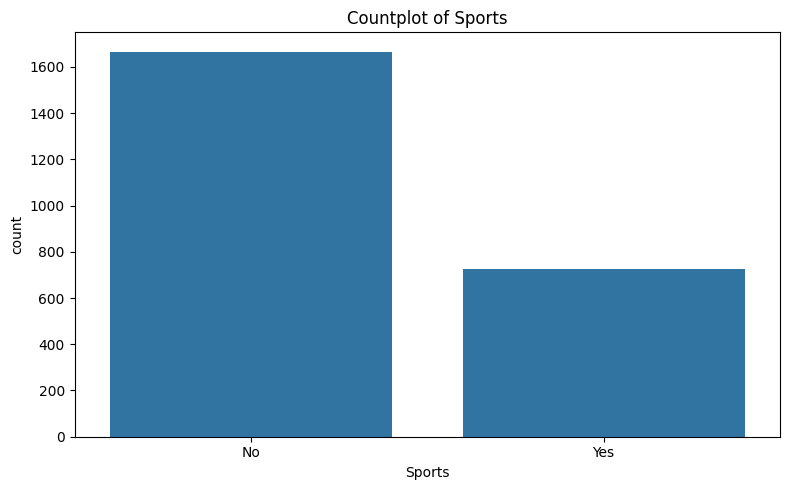

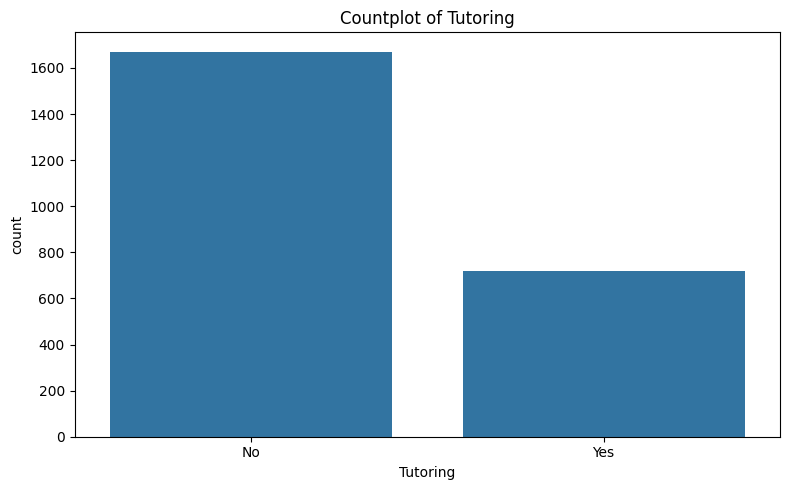

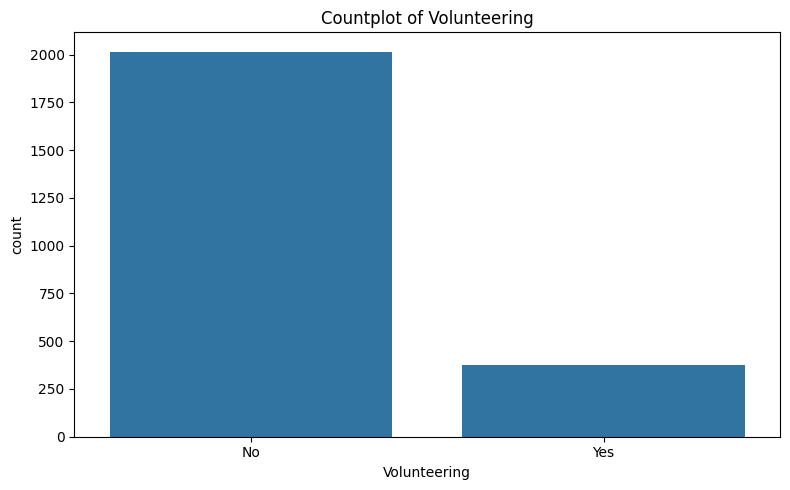

In [18]:
# Plot countplots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    
    # Directly set custom labels
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)
    
    plt.tight_layout()
    plt.show()

* The age distribution is balanced, with equal representation of individuals aged 15 to 18.
* The most represented demographic is Caucasian.
* Notably, both females and males are equally represented across the dataset.
* A high number of individuals do not participate in music, sports, tutoring, volunteering or any other extracurricular activity.
* Most parents have some college education, followed by high school graduates and then those with bachelor's degrees.
* Parental support follows a normal distribution, with most parents providing moderate support.

## 3.2 Distribution of Numerical Columns

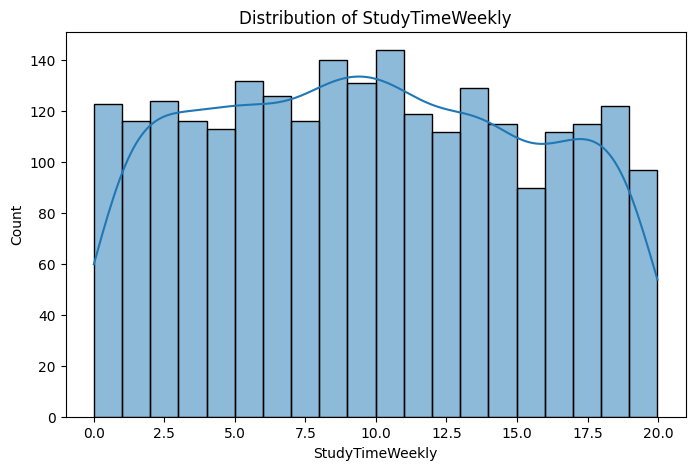

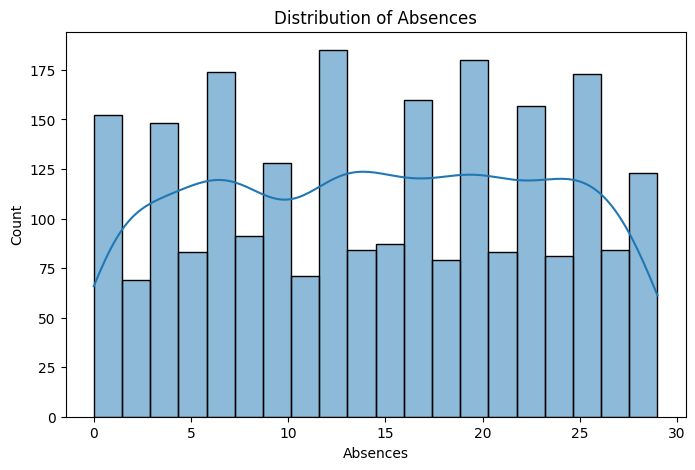

In [20]:
# Plot histogram for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

* The distribution of absences is highly variable. There is no clear pattern but significant fluctuations.

## 3.3. Exploring Correlations

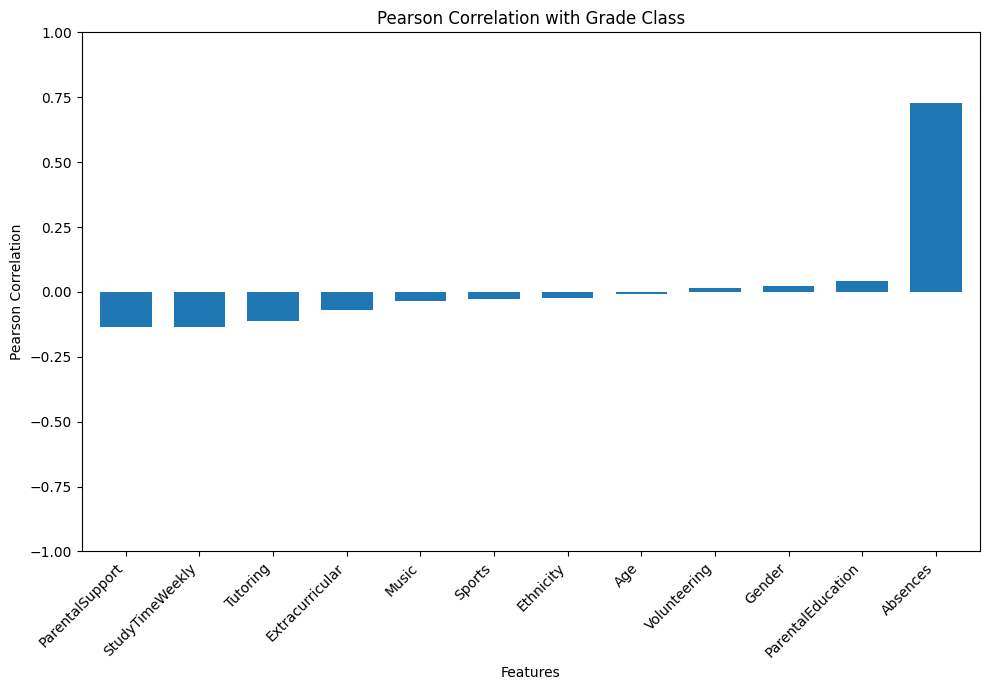

In [22]:
# Compute Pearson correlation coefficients
correlations = df.corr(numeric_only=True)['GradeClass'][:-1].sort_values()

# Set the size of the figure
plt.figure(figsize=(10, 7))

# Create a bar plot of the Pearson correlation coefficients
ax = correlations.plot(kind='bar', width=0.7)

# Set the y-axis limits and labels
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features', 
       title='Pearson Correlation with Grade Class')

# Rotate x-axis labels for better readability
ax.set_xticklabels(correlations.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

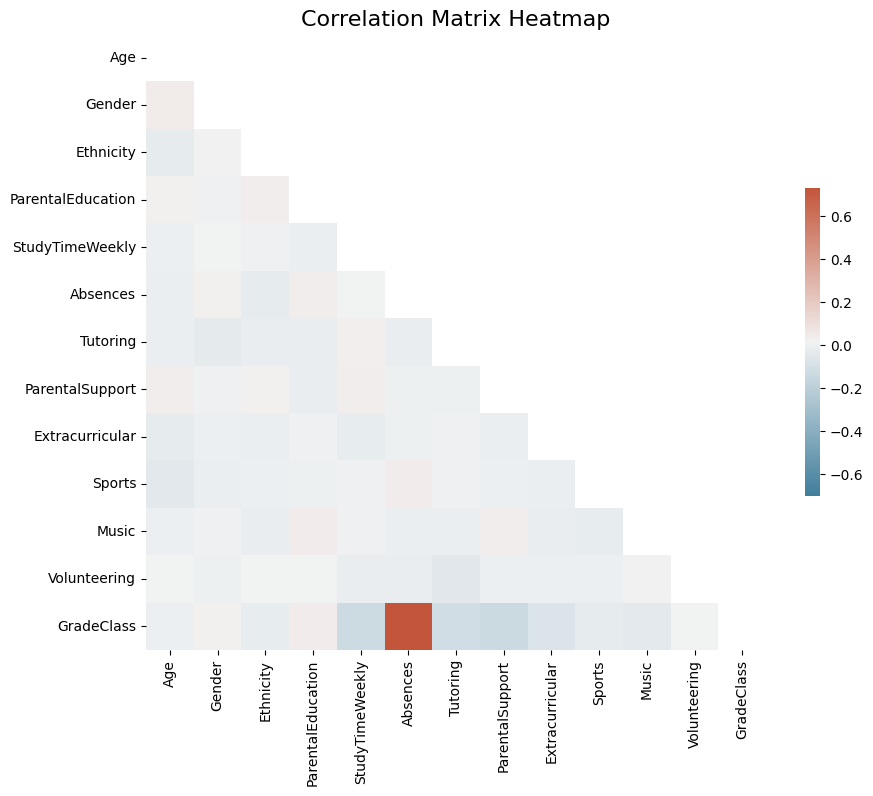

In [24]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Choose a diverging color scheme
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),cmap=cmap, cbar_kws={"shrink": .5}, vmin=-0.7, mask=mask)
plt.title('Correlation Matrix Heatmap', fontsize=16)

plt.show()

In [25]:
# Calculate the correlation with the Grade Class and find the strongest correlation
grade_class_corr = df.corr(numeric_only=True)['GradeClass'].drop('GradeClass')
strongest_correlation = grade_class_corr.idxmax()
strongest_correlation_value = grade_class_corr.max()

print(f"The strongest correlation with the Grade Class is {strongest_correlation} with a value of {strongest_correlation_value:.2f}")

The strongest correlation with the Grade Class is Absences with a value of 0.73


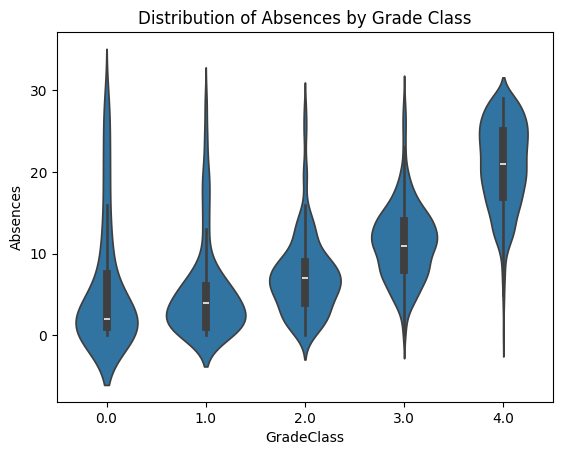

In [26]:
sns.violinplot(data=df, x='GradeClass', y='Absences')        
plt.title(f'Distribution of Absences by Grade Class')
plt.show() 

* The only variable that shows a high correlation with Grade Class is Absences, with a positive correlation of 0.73. 
* This means that more Absences are associated with a higher Grade Class. 
* This makes sense because, in our dataset, the best grade (A) is represented by 0 and the worst grade (F) is represented by 4.
* The features are not correlated with each other, which is beneficial as it indicates a lack of multicollinearity, ensuring that each feature provides unique information for analysis.

## 3.4. Exploring Outliers

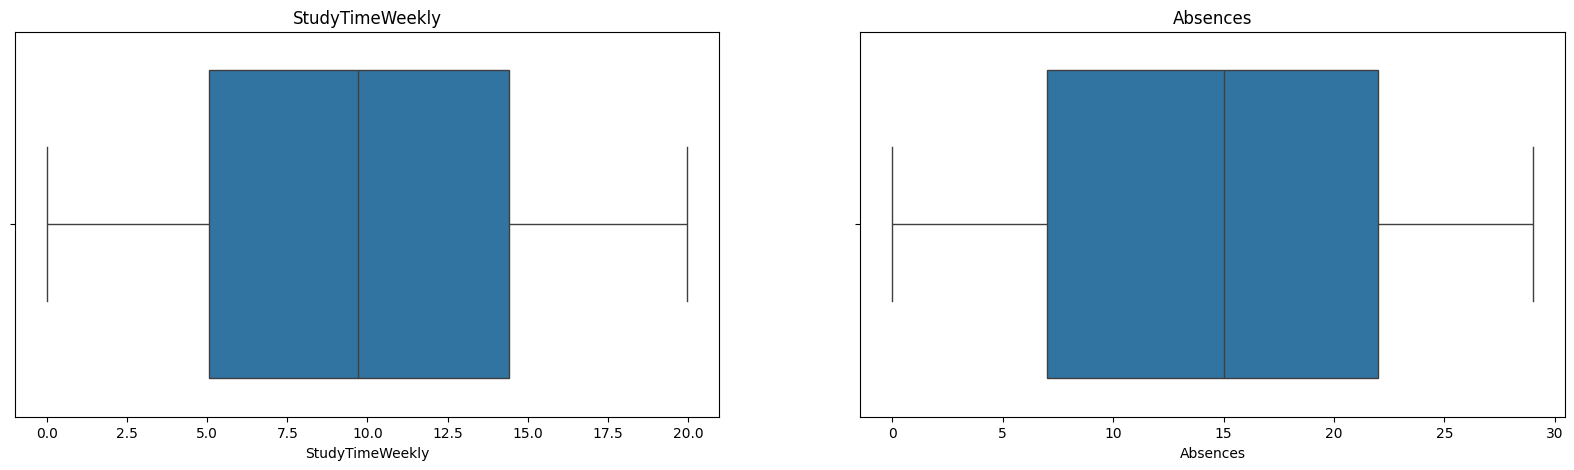

In [27]:
# Create a 1x2 subplot with a figure size of 20x5 inches
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Loop through the first two numerical columns in the DataFrame
for idx in range(2):
    # Create a boxplot for each column
    sns.boxplot(ax=ax[idx], x=df[numerical_columns[idx]])
    ax[idx].set_title(numerical_columns[idx])

In [31]:
# Calculate the Z-scores for the numerical columns in the DataFrame
z_scores = stats.zscore(df[numerical_columns])
z_scores_df = pd.DataFrame(z_scores, columns=numerical_columns)  # convert to DataFrame
# Generate descriptive statistics for the Z-scores and round the results to 3 decimal places
z_scores_df.describe().round(3)

,StudyTimeWeekly,Absences
count,2392.000,2392.000
mean,0.000,0.000
std,1.000,1.000
min,-1.729,-1.718
25%,-0.837,-0.891
50%,-0.012,0.054
75%,0.820,0.881
max,1.806,1.708


- There are no outliers in the dataset.



## 3.5. Distribution of a Target Variable


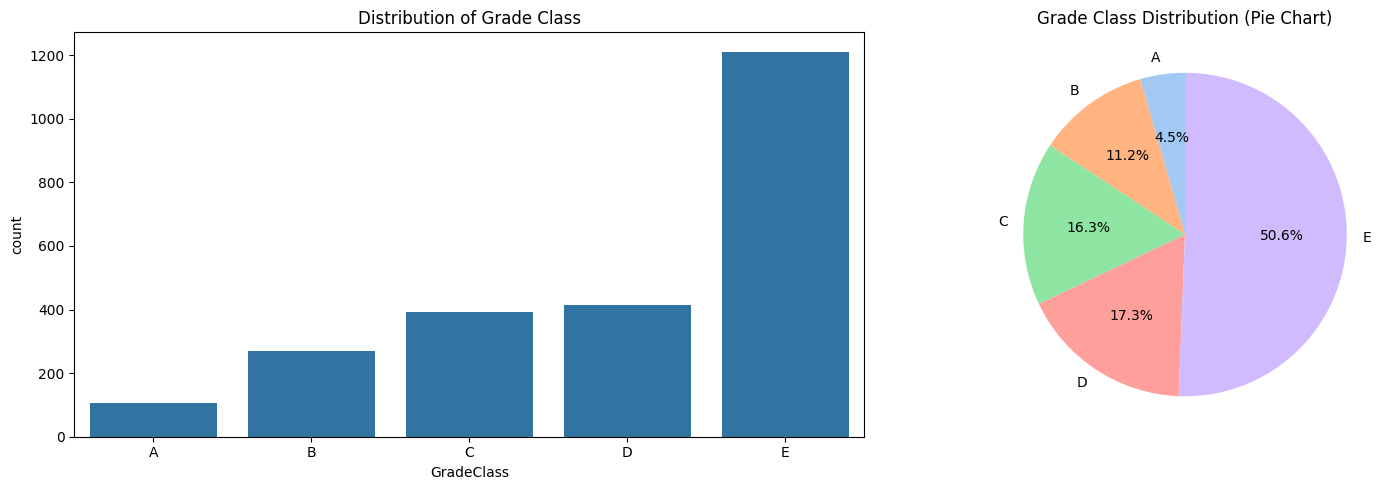

In [32]:
# Set custom labels
labels = ["A", "B", "C", "D", "E"]
ticks = range(len(labels))

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot the count plot on the first subplot
sns.countplot(data=df, x='GradeClass', ax=axes[0])
axes[0].set_title('Distribution of Grade Class')
axes[0].set_xticks(ticks)
axes[0].set_xticklabels(labels)

# Calculate counts for the pie chart
grade_counts = df['GradeClass'].value_counts().sort_index()

# Plot the pie chart on the second subplot
axes[1].pie(grade_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
axes[1].set_title('Grade Class Distribution (Pie Chart)')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

* The distribution of Grade Class reveals a significant imbalance, with Class E comprising approximately 50% of the dataset.
* Classes A through D exhibit notably lower frequencies, with Class A representing only about 4.5%

# 4. Data Preprocessing


## 4.1. Separate Features and Target


In [33]:
# Separate features (X) and target variable (y)
X = df.loc[:, df.columns != "GradeClass"]
y = df['GradeClass']

## 4.2. Data Scaling

In [35]:
# Standardize the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(X)

# Transform the data
X_scaled = scaler.transform(X)

## 4.3. Train / Test Split

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101, stratify=y)

# 5. Modeling

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101, stratify=y)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# 6.Evaluation

MSE : 0.64
MAE : 0.59
MAPE : 382377502733329.62
R2 Score : 0.58


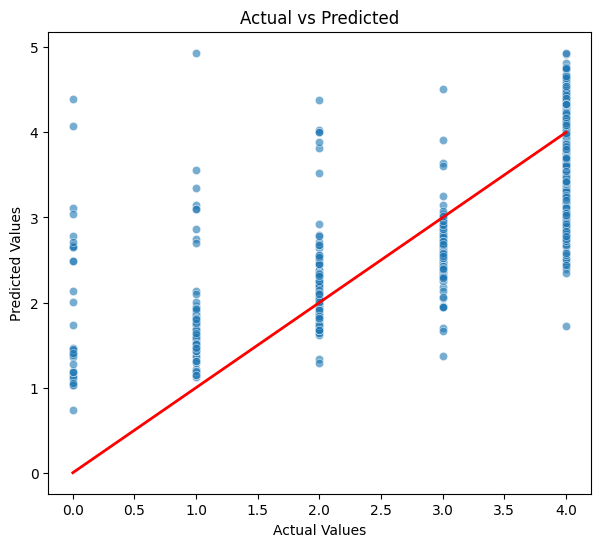

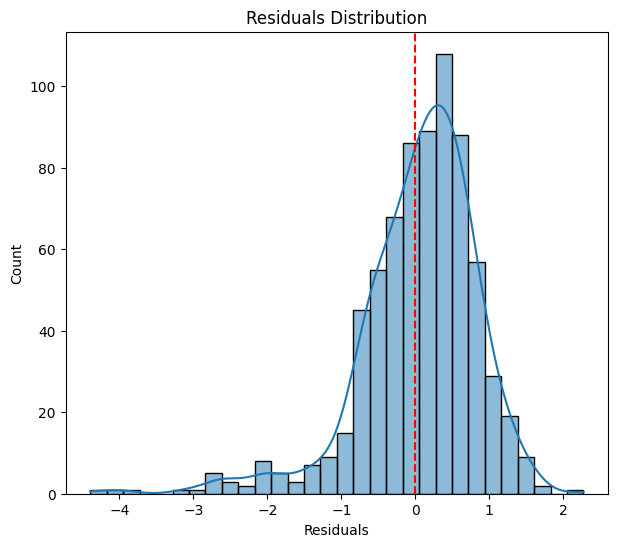

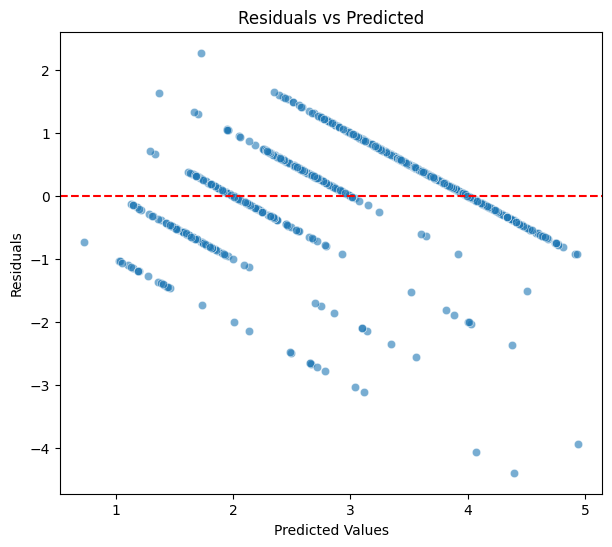

In [51]:
y_pred = model.predict(X_test)
print(f"MSE : {mean_squared_error(y_test,y_pred):.2f}")
print(f"MAE : {mean_absolute_error(y_test,y_pred):.2f}")
print(f"MAPE : {mean_absolute_percentage_error(y_test,y_pred):.2f}")
print(f"R2 Score : {r2_score(y_test,y_pred):.2f}")

# --- Visualization Section ---

# 1. Actual vs Predicted Scatter Plot
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2)  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

# 2. Residuals Distribution
residuals = y_test - y_pred
plt.figure(figsize=(7,6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()

# 3. Residuals vs Predicted
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# --- Linear Regression (already done) ---
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

print("📌 Linear Regression Performance:")
print(f"MSE  : {mean_squared_error(y_test,y_pred_lin):.2f}")
print(f"MAE  : {mean_absolute_error(y_test,y_pred_lin):.2f}")
print(f"MAPE : {mean_absolute_percentage_error(y_test,y_pred_lin):.2f}")
print(f"R2   : {r2_score(y_test,y_pred_lin):.2f}\n")

# --- Polynomial Regression ---
poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
    ("lin_reg", LinearRegression())
])

poly_reg.fit(X_train, y_train)
y_pred_poly = poly_reg.predict(X_test)

print("📌 Polynomial Regression Performance (degree=3):")
print(f"MSE  : {mean_squared_error(y_test,y_pred_poly):.2f}")
print(f"MAE  : {mean_absolute_error(y_test,y_pred_poly):.2f}")
print(f"MAPE : {mean_absolute_percentage_error(y_test,y_pred_poly):.2f}")
print(f"R2   : {r2_score(y_test,y_pred_poly):.2f}\n")

📌 Linear Regression Performance:
MSE  : 0.64
MAE  : 0.59
MAPE : 382377502733329.62
R2   : 0.58

📌 Polynomial Regression Performance (degree=3):
MSE  : 0.62
MAE  : 0.54
MAPE : 308597098339334.12
R2   : 0.59



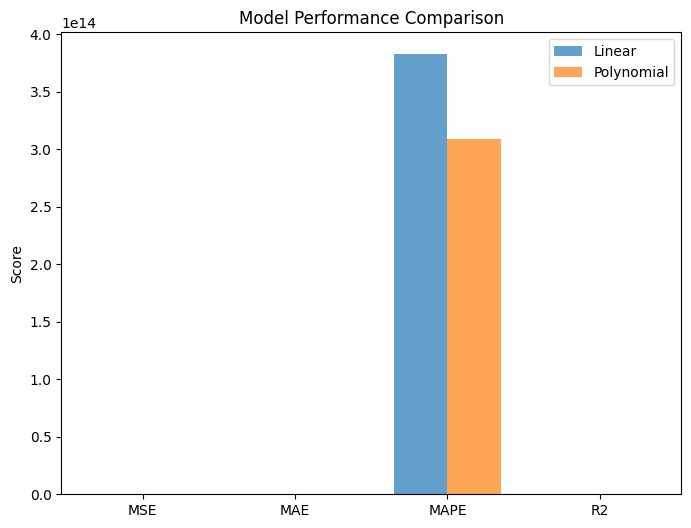

In [55]:
# --- Comparison Bar Plot ---

metrics = ["MSE", "MAE", "MAPE", "R2"]
linear_scores = [
    mean_squared_error(y_test,y_pred_lin),
    mean_absolute_error(y_test,y_pred_lin),
    mean_absolute_percentage_error(y_test,y_pred_lin),
    r2_score(y_test,y_pred_lin)
]
poly_scores = [
    mean_squared_error(y_test,y_pred_poly),
    mean_absolute_error(y_test,y_pred_poly),
    mean_absolute_percentage_error(y_test,y_pred_poly),
    r2_score(y_test,y_pred_poly)
]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,6))
plt.bar(x - width/2, linear_scores, width, label="Linear", alpha=0.7)
plt.bar(x + width/2, poly_scores, width, label="Polynomial", alpha=0.7)
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()
